<a href="https://colab.research.google.com/github/DurdenTyler2008/University-of-AI/blob/main/3_%D0%93%D0%B5%D0%BD%D0%B5%D1%82%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%B8%D0%B5_%D0%B0%D0%BB%D0%B3%D0%BE%D1%80%D0%B8%D1%82%D0%BC%D1%8B_%D0%B4%D0%BB%D1%8F_%D0%BE%D0%B1%D1%83%D1%87%D0%B5%D0%BD%D0%B8%D1%8F_%D0%BD%D0%B5%D0%B9%D1%80%D0%BE%D0%BD%D0%BD%D1%8B%D1%85_%D1%81%D0%B5%D1%82%D0%B5%D0%B9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Сделайте самостоятельно довольно мощную свёрточную сеть для Cifar10.

- Добейтесь, чтобы ГА сделал точность на проверочной заметно выше, чем у вашей сети.

- Для скорости можно использовать для обучения первые 1000 картинок и для проверки следующие 200 картинок


###Загрузка библиотек:

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import utils                                              # Для to_categorical
from keras.optimizers import Adam 
from keras.models import Sequential, Model                                      # Два варианты моделей
from keras.layers import concatenate,Reshape, Input,Conv2DTranspose, Lambda, Dense, Dropout, BatchNormalization, Flatten, Conv1D, Conv2D, LSTM, MaxPooling1D, Activation, GlobalMaxPooling1D, UpSampling1D#Стандартные слои
from keras.losses import MAE
from google.colab import files                                                  # Загрузка файлов
from sklearn.preprocessing import StandardScaler, MinMaxScaler                  # Нормировщики
from keras.preprocessing.sequence import TimeseriesGenerator                    # Для генерации выборки временных рядов
import keras.backend as K
import random as random
from PIL import Image                                                           # Импортируем одель Image для обработки изображений
import time
from tensorflow.keras.utils import plot_model
from IPython.display import clear_output, Image
from keras.datasets import cifar10
from keras.layers import Input, Convolution2D, MaxPooling2D, Dense, Dropout, Flatten
from keras.utils import np_utils
from keras.models import Model
from keras.constraints import maxnorm
# Статический вывод графики (графики отображаются в той ячейке, в которой используется plt.show())
%matplotlib inline

In [14]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
cifar10

<module 'keras.datasets.cifar10' from '/usr/local/lib/python3.7/dist-packages/keras/datasets/cifar10.py'>

In [15]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [ ]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)
(50000, 1)
(10000, 1)


In [ ]:
x_train_small = x_train[0:1000]
x_test_small = x_test[0:200]
y_train_small = y_train[0:1000]
y_test_small = y_test[0:200]

In [ ]:
print(x_train_small.shape)
print(x_test_small.shape)
print(y_train_small.shape)
print(y_test_small.shape)

(1000, 32, 32, 3)
(200, 32, 32, 3)
(1000, 1)
(200, 1)


In [ ]:
#--------------------------------------------------

In [16]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [17]:
X_train = X_train.astype('float32') 
X_test = X_test.astype('float32') 
X_train = X_train / 255.0 
X_test = X_test / 255.0

In [18]:
y_train = np_utils.to_categorical(y_train) 
y_test = np_utils.to_categorical(y_test) 
num_classes = y_test.shape[1]

In [ ]:
model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape=(32,32,3), activation='relu', padding='same')) 
model.add(Dropout(0.2)) 
model.add(Conv2D(32, (3, 3), activation='relu', padding='same')) 
model.add(MaxPooling2D(pool_size=(2, 2))) 
model.add(Conv2D(64, (3, 3), activation='relu', padding='same')) 
model.add(Dropout(0.2)) 
model.add(Conv2D(64, (3, 3), activation='relu', padding='same')) 
model.add(MaxPooling2D(pool_size=(2, 2))) 
model.add(Conv2D(128, (3, 3), activation='relu', padding='same')) 
model.add(Dropout(0.2)) 
model.add(Conv2D(128, (3, 3), activation='relu', padding='same')) 
model.add(MaxPooling2D(pool_size=(2, 2))) 
model.add(Flatten()) 
model.add(Dropout(0.2)) 
model.add(Dense(1024, activation='relu')) 
model.add(Dropout(0.2)) 
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2)) 
model.add(Dense(num_classes, activation='softmax'))

In [ ]:
print(model.summary())

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_91 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
dropout_57 (Dropout)         (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_92 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_38 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_93 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
dropout_58 (Dropout)         (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_94 (Conv2D)           (None, 16, 16, 64)       

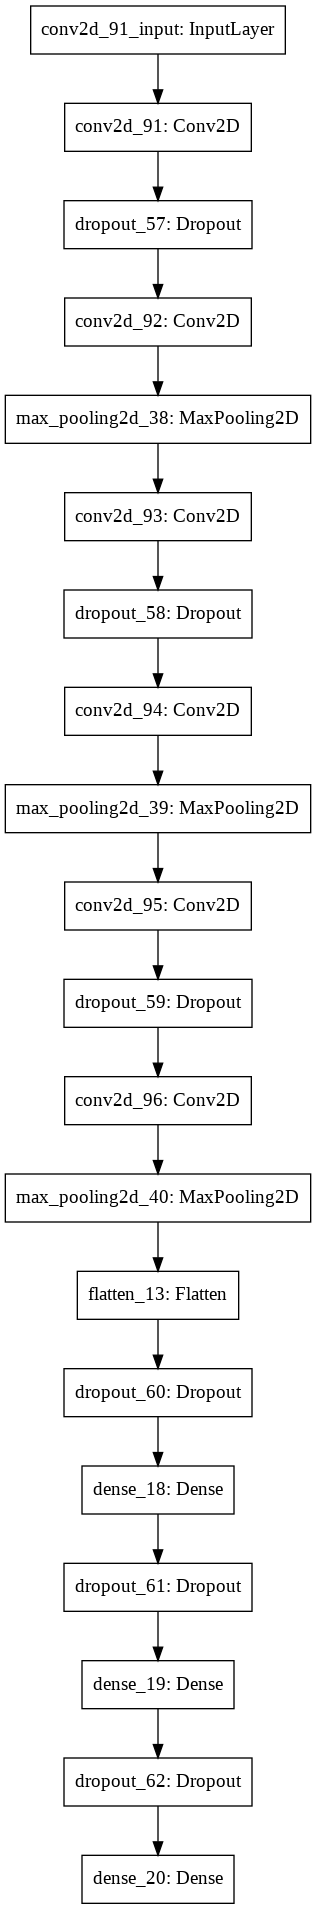

In [ ]:
plot_model(model)

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer="Adam", metrics=['accuracy'])

In [ ]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=30, batch_size=32, verbose=0) 

scores = model.evaluate(X_test, y_test, verbose=0) 
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 77.19%


In [ ]:
#-----------------------------------------------------

##**Подбор линейной архитектуры**
*Входной слой*

0 - делаем ли нормализацию

1 - размер первого свёрточного слоя

2 - ядро первого свёрточного слоя

3 - функция активации первого слоя

4 - делаем ли MaxPooling0

5 - размер MaxPooling0

*Определяем кол-во сверточных слоев*

6 - Делаем ли сверточные слои

7 - размер сверточного слоя

8 - ядро сверточного слоя

9 - делаем ли MaxPooling

10 - размер MaxPooling

11- делаем ли Dropout

12 - размер Dropout

13 - функция активации для сверточных слоев

14 - функция активации предпоследнего слоя

15 - функция активации выходного слоя

*Предпоследний скрытый слой*

16 - делаем ли финальную нормализацию

17 - размер предпоследнего полносвязного слоя

In [27]:
def createConvNet(net):

    model = Sequential()             # Создаем моель Sequential
    
    makeFirstNormalization = net[0]  # Делаем ли нормализацию в начале
    firstConvSize = 2 ** net[1]      # Размер первого свёрточного слоя
    firstConvKernel = net[2]         # Ядро первого свёрточного слоя
    activation0 = net[3]             # Функция активации входного слоя
    makeMaxPooling0 = net[4]         # Делаем ли maxpooling для нулевого слоя
    maxPoolingSize0 = net[5]         # Размер MaxPooling

    makeNumberConv = net[6]          # определяем кол-во сверточных слоев
    ConvSize = 2 ** net[7]           # Размер №-го свёрточного слоя
    ConvKernel = net[8]              # Ядро №-го свёрточного слоя
    makeMaxPooling = net[9]          # Делаем ли MaxPooling
    maxPoolingSize = net[10]         # Размер MaxPooling
    makeDropout = net[11]            # Делаем ли Dropout
    makeDropoutSize = net[12]        # Размер Dropout
    activation1 = net[13]            # Функция активации для сверточных слоев

    activation2 = net[14]            # Функция активации для предпоследнего слоя
    activation3 = net[15]            # Функция активации для выходного слоя

    makeSecondNormalization = net[16] # Делаем ли финальную нормализацию
    denseSize = 2 ** net[17]          # Размер полносвязного слоя

    activation_list = ['linear','relu','elu','tanh','softmax','sigmoid','hard_sigmoid'] 
    dropout_list = [0.1, 0.2, 0.3, 0.4]

    if makeFirstNormalization:        # Если делаем нормализацию в начале
      # Добавляем слой BatchNormalization
      model.add(BatchNormalization(input_shape=(32, 32, 3))) 
      # Добавляем Conv1D-слой с firstConvSize нейронами и ядром (firstConvKernel)
      model.add(Conv2D(ConvSize, (firstConvKernel, firstConvKernel), activation=activation_list[activation0], padding='same')) 

    else:
      # Добавляем Conv1D-слой с firstConvSize нейронами и ядром (firstConvKernel)
      model.add(Conv2D(ConvSize, (firstConvKernel, firstConvKernel), activation=activation_list[activation0], padding='same')) 

    if makeMaxPooling0:                 # Если делаем maxpooling
      model.add(MaxPooling2D(maxPoolingSize0, maxPoolingSize0))

    if makeNumberConv:                  # Если делаем еще сверточные слои
        i = 1
        while i <= makeNumberConv:        
            # Добавляем сверточные слои в количестве i
            model.add(Conv2D(ConvSize, (firstConvKernel, firstConvKernel), activation=activation_list[activation1], padding='same'))
            #i += 1
            if makeMaxPooling:          # Если делаем MaxPooling
                # Добавляем слой MaxPooling с размером maxPoolingSize
                model.add(MaxPooling2D(pool_size=(maxPoolingSize, maxPoolingSize)))
                #model.add(MaxPooling2D(pool_size=(2)))
                if makeDropout:         # Если делаем Dropout
                    # Добавляем слой Dropout с размером makeDropoutSiz
                    model.add(Dropout(dropout_list[makeDropoutSize]))
            i += 1

    if makeSecondNormalization:     # Если делаем финальную нормализацию
        model.add(BatchNormalization()) # Добавляем слой BatchNormalization
    
    model.add(Flatten())              # Добавляем слой Flatten

    model.add(Dense(denseSize, activation=activation_list[activation2])) # Добавляем слой Dense с denseSize нейронами
    model.add(Dense(10, activation=activation_list[activation3]))         # Добавляем Dense-слой с softmax-активацией и 10 нейронами
    
    return model  

In [30]:
def evaluateNet(net, ep, verb):               # Функция вычисления результата работы сети
    val = 0
    time.time()
    model = createConvNet(net)                # Создаем модель createConvNet

    # Компилируем модель
    model.compile(loss='categorical_crossentropy', optimizer="Adam", metrics=['accuracy'])

    model.fit(X_train[0:800], y_train[0:800], validation_data=(X_test[0:150], y_test[0:150]), epochs=10, batch_size=32, verbose=0) 

    scores = model.evaluate(X_test, y_test, verbose=0) 
    print("Accuracy: %.2f%%" % (scores[1]*100))
      
    #val = history.history["val_loss"][-1]    # Возвращаем точность на проверочной выборке с последней эпохи
    
    return val, model                        # Возвращаем точность


def createRandomNet():              # Функция создания списка случайных параметров
    net = []
    net.append(random.randint(0,1)) #0.Делаем или нет нормализацию
    net.append(random.randint(3,6)) #1.Первый свёрточный слой от 8 до 64 нейронов
    net.append(random.randint(3,7)) #2.Ядро первого свёрточного слоя от 3 до 7
    net.append(random.randint(0,6)) #3. Функция активации первого слоя
    net.append(random.randint(0,1)) #4.Делаем ли MaxPooling
    net.append(random.randint(2,3)) #5.Размер MaxPooling
    net.append(random.randint(1,4)) #6.определяем кол-во сверточных слоев
    net.append(random.randint(3,10)) #7.Cвёрточный слой от 8 до 1024 нейронов
    net.append(random.randint(3,7)) #8. Ядро второго свёрточного слоя от 3 до 7
    net.append(random.randint(0,1)) #9. Делаем ли MaxPooling
    net.append(random.randint(2,3)) #10.Размер MaxPooling
    net.append(random.randint(0,1)) #11. Делаем ли Dropout
    net.append(random.randint(0,3)) #12.Размер Dropout
    net.append(random.randint(0,6)) #13.Функция активации для сверточных слоев
    net.append(random.randint(0,6)) #14.Функция активации для предпоследнего слоя
    net.append(random.randint(0,6)) #15.Функция активации для выходного слоя
    net.append(random.randint(0,1)) #16.Делаем ли финальную нормализацию
    net.append(random.randint(3,6)) #17. Размер полносвязного слоя

    return net

In [ ]:
n = 20              # Общее число ботов
nsurv = 10          # Количество выживших (столько лучших переходит в новую популяцию)
nnew = n - nsurv    # Количество новых (столько новых ботов создается)
l = 18              # Размер бота
epohs = 5          # количество эпох

mut = 0.09          # коэфициент мутаций

popul = []          # Массив популяции
val = []            # Одномерный массив значений этих ботов

#Создаём случайных ботов
for i in range(n):
  popul.append(createRandomNet())
  
for it in range(epohs):                 # Пробегаем по всем эпохам
  val = []                              # Обнуляем значения бота
  curr_time = time.time()
  for i in range(n):                    # Пробегаем в цикле по всем ботам 
    bot = popul[i]                      # Берем очередного бота
    f, model_sum = evaluateNet(bot, 3, 0) # Вычисляем точность текущего бота
    val.append(f)                       # Добавляем полученное значение в список val
  
  sval = sorted(val, reverse=0)         # Сортируем val
  # Выводим 5 лучших ботов
  print(it, time.time() - curr_time, " ", sval[0:5],popul[:5]) 
  
  newpopul = []                         # Создаем пустой список под новую популяцию
  for i in range(nsurv):                # Пробегаем по всем выжившим ботам
    index = val.index(sval[i])          # Получаем индекс очередного бота из списка лучших в списке val
    newpopul.append(popul[index])       # Добавляем в новую популяцию бота из popul с индексом index
    
  for i in range(nnew):                 # Проходимся в цикле nnew-раз  
    indexp1 = random.randint(0,nsurv-1) # Случайный индекс первого родителя в диапазоне от 0 до nsurv - 1
    indexp2 = random.randint(0,nsurv-1) # Случайный индекс первого родителя в диапазоне от 0 до nsurv - 1
    botp1 = newpopul[indexp1]           # Получаем первого бота-родителя по indexp1
    botp2 = newpopul[indexp2]           # Получаем второго бота-родителя по indexp2    
    newbot = []                         # Создаем пустой список под значения нового бота    
    net4Mut = createRandomNet()         # Создаем случайную сеть для мутаций
    for j in range(l):                  # Пробегаем по всей длине размерности (784)      
      x = 0      
      pindex = random.random()          # Получаем случайное число в диапазоне от 0 до 1

      # Если pindex меньше 0.5, то берем значения от первого бота, иначе от второго
      if pindex < 0.5:
        x = botp1[j]
      else:
        x = botp2[j]
      
      # С вероятностью mut устанавливаем значение бота из net4Mut
      if (random.random() < mut):
        x = net4Mut[j]
        
      newbot.append(x)                  # Добавляем очередное значение в нового бота      
    newpopul.append(newbot)             # Добавляем бота в новую популяцию      
  popul = newpopul                      # Записываем в popul новую посчитанную популяцию

Accuracy: 10.00%


In [ ]:
#------------------------------------------------------------------------------------------